손글씨 데이터인 MNIST을 가지고 MLP를 설계해보겠습니다.

코드를 세세한 주석처리를 통해 뜯어보겠습니다.

In [1]:
import numpy as np #선형대수 관련 함수 이용 가능 모듈
import matplotlib.pyplot as plt#시각화 모듈
import torch #파이토치 기본모듈
import torch.nn as nn #신경망 모델 설계 시 필요한 함수
import torch.nn.functional as F # 자주 이용되는 함수'F'로 설정
from torchvision import transforms, datasets #torchvision모듈 내 transforms, datasets함수 임포트

In [2]:
#딥러닝 모델 설계 때 필요한 장비 확인

if torch.cuda.is_available():
    DEVICE = torch.device('cuda') #GPU이용
    
else:
    DEVICE = torch.device('cpu') #GPU이용안되면 CPU이용
    
print('Using PyTorch version:', torch.__version__, ' Device:', DEVICE)

Using PyTorch version: 1.9.0+cu111  Device: cuda


In [3]:
BATCH_SIZE = 32 #MLP모델 학습 시 필요한 데이터 개수 단위
EPOCHS = 10 #Mini_Batch 1개 단위로 역전파 이용하여 MLP의 가중값을 업데이트하여 전부 이용하는 횟수

BATCH_SIZE = 32 : Mini_Batch 1개당 데이터 32개 구성

Iteration: Mini_Batch를 이용해 학습하는 횟수

Epoch: 전체 데이터 이용하여 학습 진행 횟수(하이퍼파라미터)

In [4]:
#데이터 다운로드

train_dataset = datasets.MNIST(root ="../data/MNIST",
                               train = True,
                               download = True,
                               transform = transforms.ToTensor( ))

test_dataset = datasets.MNIST(root ="../data/MNIST",
                               train = False,
                            
                               transform = transforms.ToTensor( ))


#데이터셋을 Mini_Batch단위로 분리

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = BATCH_SIZE,
                                           shuffle = True)


test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = BATCH_SIZE,
                                           shuffle = False)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../data/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../data/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../data/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../data/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/MNIST/raw



/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


- MNIST 데이터셋 다운로드(train, test dataset)

   - root: 데이터 저장 장소 지정
   
   - train: MLP모델 학습을 위한 학습용 데이터인지, 성능 검증을 위한 검증용 데이터인지 지정
   
      - train_dataset: train=True
      
      - test_dataset: train=False
      
   - download: 인터넷 상에서 데이터 다운로드
   
   - transform: 이미지 불러오면서 전처리 동시에 진행
   
      - ToTensor(): tensor형태로 변경
      
      - 0 ~ 255  -> 0 ~ 1(정규화)
      
      - Input이용


<br>

- MNIST 데이터셋 Mini_Batch단위로 분리(loader)

   - Dataloader함수: Mini_batch이용
   
   - dataset: Mini_Batch 단위로 할당하는 데이터셋 지정하고, 학습은 train_loader로 성능 확인은 test_loader로 설정
   
   - batch_size: Mini_batch 1개 단위로 구성하는 데이터 개수 지정
   
   - shuffle: 데이터 순서 섞기로 label의 순서 암기해서 학습 진행

In [6]:
#데이터 확인

for (X_train, y_train) in train_loader:
     print('X_train:', X_train.size( ), 'type:', X_train.type( ))
     print('y_train:', y_train.size( ), 'type:', y_train.type( ))
    
    

X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor
X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor
X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor
X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor
X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor
X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor
X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor
X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor
X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor
X_train: t

- X_train: (32,28,28,1)

   - 이미지 데이터 :32(Mini_batch)
   
   - 가로 : 28, 세로: 28. 1 : Gray scale(흑백)
   
   - torch.FloatTensor형태
   
   

<br>

- y_trian: ([32])

   - 이미지 데이터 :32
   
   - label값이 1개씩 존재하므로 총 32개있다.
   
   - torch.LongTensor형태

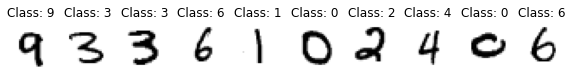

In [10]:
#시각화

pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.axis('off')
    plt.imshow(X_train[i, :, :, :].numpy( ).reshape(28,28), cmap = "gray_r")
    plt.title('Class: ' + str(y_train[i].item()))